## Conteos de palabras en el Congreso de los Diputados

Contamos palabras presentes en la totalidad de Diarios de Sesiones del Congreso con el fin de estudiar la polarización y crispación.

Tendremos en cuenta el año, grupo político, género de cada orador y el número total de palabras en cada año.

In [1]:
import pickle

# Importamos los diccionarios con objetos Counter

dir = r"C:\Users\acent\Academico\proyecto-excelencia\parte-practica\database\words.pkl"
freq = {}
with open(dir, "rb") as f:
    freq = pickle.load(f)

# freq[año][grupo][palabra] = "número de veces que un diputado de un grupo en un año pronuncia esa palabra"
# freq[año][grupo][nwords] = "número de total de palabras pronunciadas por los diputados de un grupo en un año"
# freq[año][grupo - Male][palabra] = "número de veces que un diputado varón de un grupo en un año pronuncia esa palabra"
# freq[año][grupo - Female][palabra] = "número de veces que una diputado mujer de un grupo en un año pronuncia esa palabra"

In [2]:
print("Frecuencia de 'vivienda' por el PP en 2007:", freq[2007]["PP"]["vivienda"] ,f"\nTotal de palabras por el PP en 2007: {freq[2007]["PP"]["nwords"]}")

Frecuencia de 'vivienda' por el PP en 2007: 168 
Total de palabras por el PP en 2007: 457435


El rango de años estudiado es la primera sesión parlamentaria de la primera legislatura en 1979 hasta la cuadragésimo tercera sesión de la quinceava legislatura, el 28 de mayo de 2024.

    (1979-2024)

In [3]:
years = []
year = 1979
while (year <= 2024):
    years.append(year)
    year+=1

Consideramos las siguientes agrupaciones políticas:

    PP, PSOE, VOX, IU-PODEMOS (incluye SUMAR)

In [4]:
partidos = ["VOX", "PP", "PSOE", "IU-PODEMOS"]
partidos_hombres = [agrupacion + " - Male" for agrupacion in partidos]
partidos_mujeres = [agrupacion + " - Female" for agrupacion in partidos]
indexes = []

for a in partidos:
    indexes.append(a)
for a in partidos_hombres:
    indexes.append(a)
for a in partidos_mujeres:
    indexes.append(a)

Guardamos la frecuencia de una palabra como un dataframe (tabla o matriz).

In [5]:
import pandas as pd

def get_df(palabra):
    df = pd.DataFrame(index = years)
    for index in indexes:
        col = []
        for year in years:
            frec=freq[year][index][palabra]
            col.append(frec)     
        df[index] = col
    df["Total - Male"] = df[partidos_hombres].sum(axis=1)
    df["Total - Female"] = df[partidos_mujeres].sum(axis=1)
    df["Total"] = df["Total - Male"] + df["Total - Female"]
    return df

In [6]:
# Guardamos un dataframe con el número total de palabras

total_words = get_df("nwords")
total_words.head()

,VOX,PP,PSOE,IU-PODEMOS,VOX - Male,PP - Male,PSOE - Male,IU-PODEMOS - Male,VOX - Female,PP - Female,PSOE - Female,IU-PODEMOS - Female,Total - Male,Total - Female,Total
1979,0,248703,610350,187049,0,246154,570143,171848,0,2549,40207,15201,988145,57957,1046102
1980,0,360981,957952,190948,0,360125,914194,178781,0,856,43758,12167,1453100,56781,1509881
1981,0,273277,726164,161168,0,273163,702791,154452,0,114,23373,6716,1130406,30203,1160609
1982,0,212885,428762,108179,0,210863,410460,106584,0,2022,18302,1595,727907,21919,749826
1983,0,412540,755341,135842,0,412540,735834,129713,0,0,19507,6129,1278087,25636,1303723


## Palabras que indican crispación

Contamos la presencia de estas palabras en forma de "veces por millón". Es decir:

    freq[año][grupo][palabra] / freq[año][grupo][nwords] (n total de palabras) * 1'000'000

["corrupción", "corrupto", "corruptela", "demagogia", "demagogo", "rata", "serpiente", "cucaracha", "traidor", "traicionar", "basura", "mentira", "miente", "mentiroso", "falso", "falsedad", "engaño", "tramposo", "sucio", "repugnante", "ridículo", "ridiculez", "cáncer", "tumor", "extirpar", "memo"]

In [7]:
crisp_words = ["corrupción", "corrupto", "corruptela", "demagogia", "demagogo", "rata", "serpiente", "cucaracha", "traidor", "traicionar", "basura", "mentira", "miente", "mentiroso", "falso", "falsedad", "engaño", "tramposo", "sucio", "repugnante", "ridículo", "ridiculez", "cáncer", "tumor", "extirpar", "memo", "fascista", "fascistas", "fascismo", "dictadura", "dictador"]

In [12]:
total_words.to_excel(f"total.xlsx", index=False)

### Total de diputados

Contamos la frecuencia total de cada palabra sin importar grupo o género.

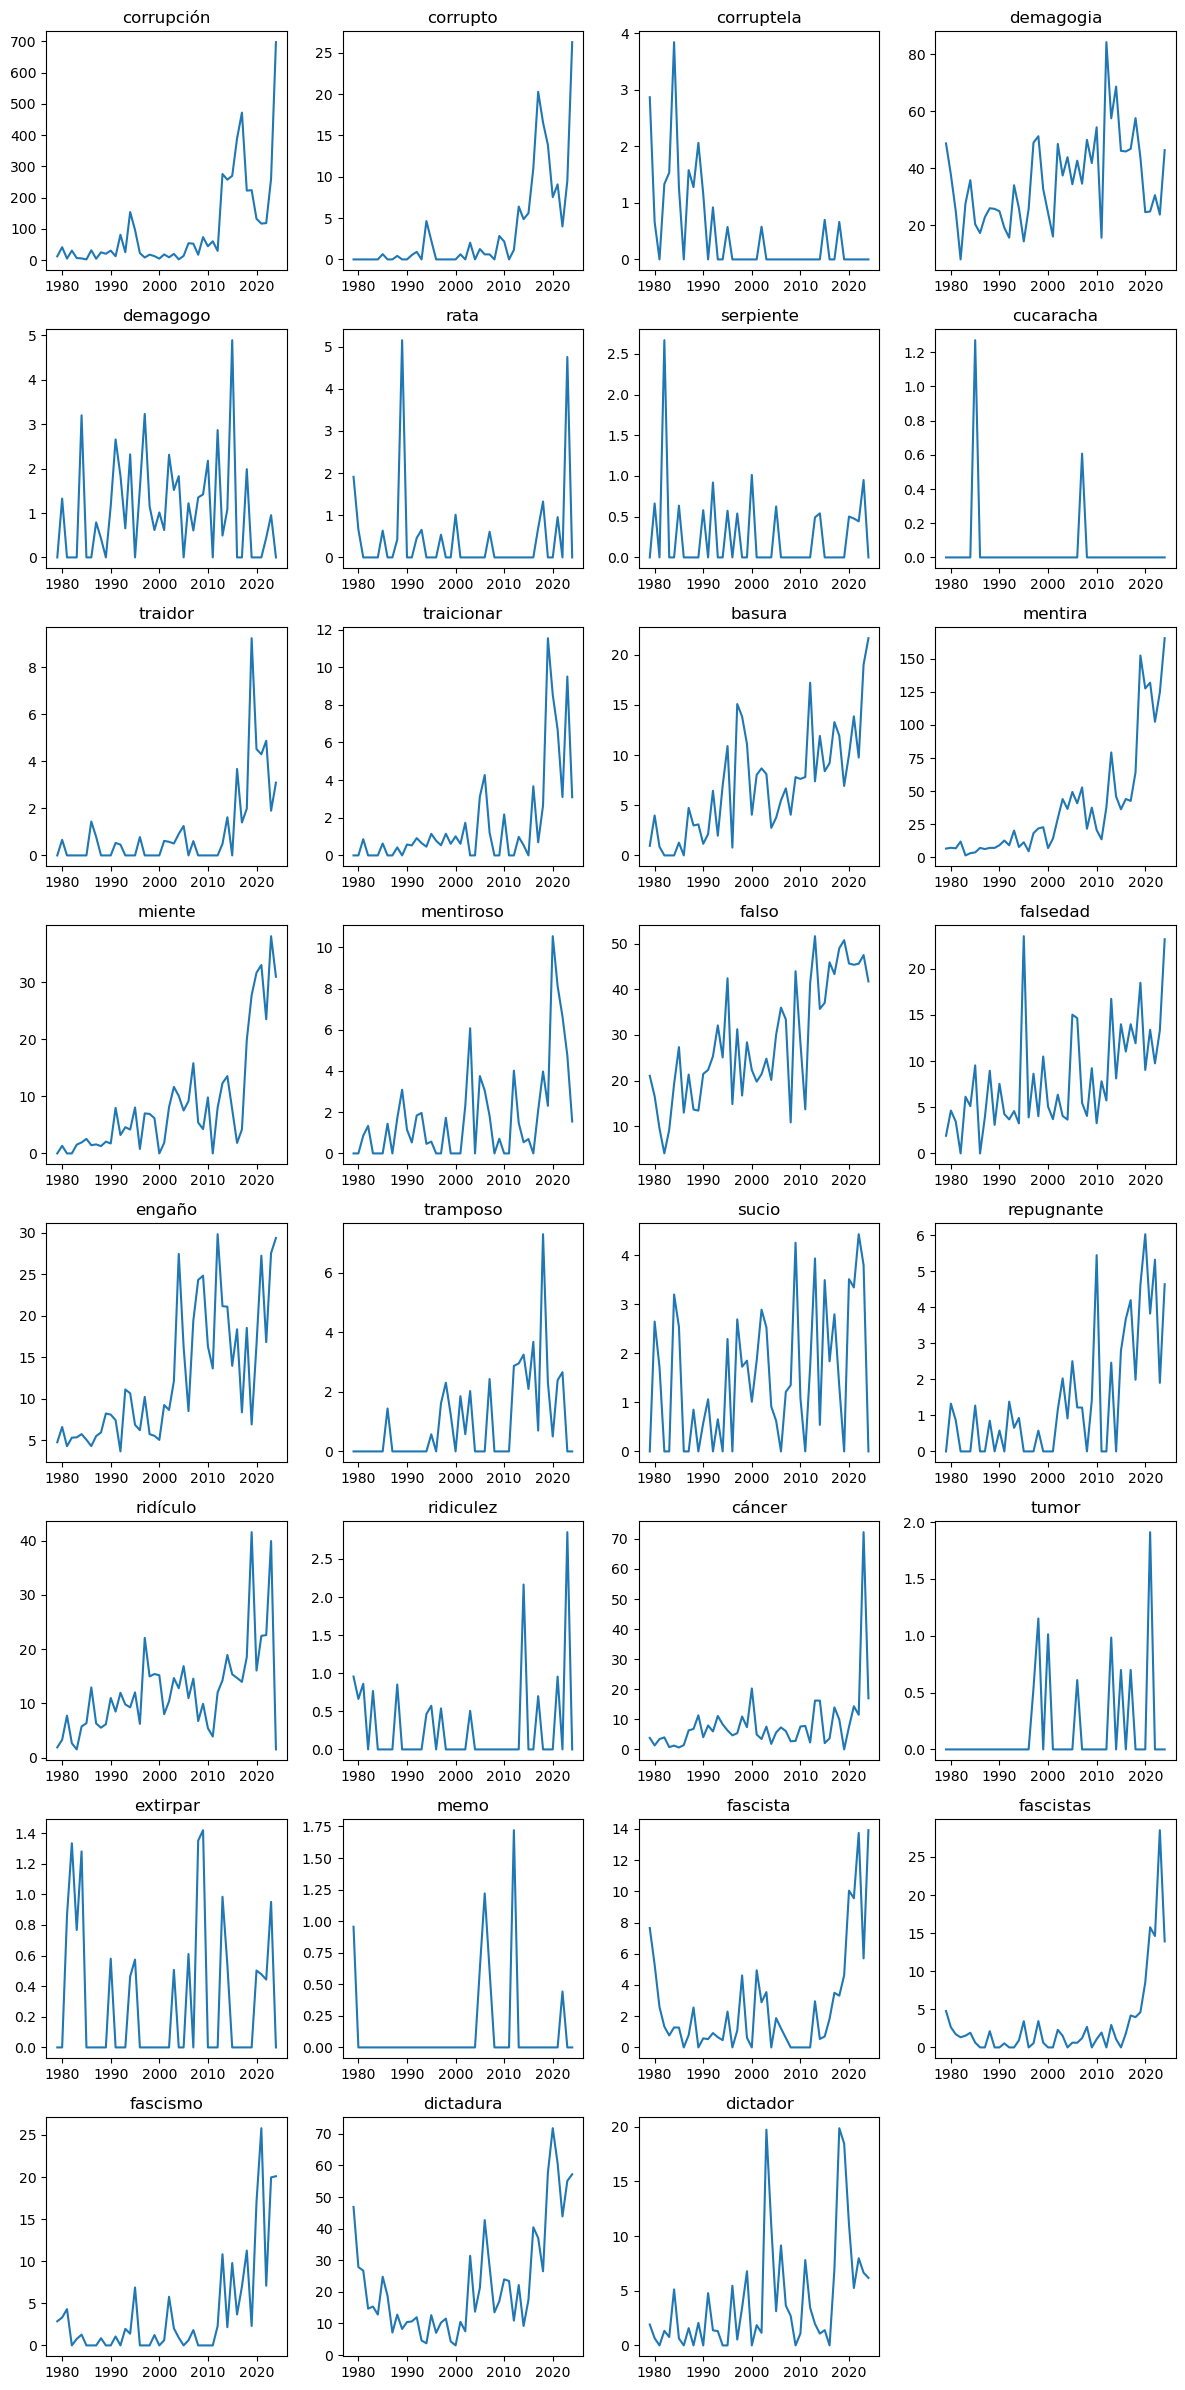

In [13]:
import matplotlib
import matplotlib.pyplot as plt

### Graficamos cada palabra por separado

fig_width = 12
plot_width = 3
columns = fig_width // plot_width
rows = len(crisp_words) // columns + 1

# Creamos una serie de cuadros que se ajustan automáticamente al número de palabras
fig, axes = plt.subplots(nrows = rows, ncols=columns, figsize=(fig_width, rows * 3))
axes = axes.flatten() 


for i, word  in enumerate(crisp_words):
    w_df = get_df(word)                     # Creamos una matriz por palabra (frecuencia absoluta)
    p_df = w_df / total_words * 1000000     # Creamos la matriz por millón (frecuencia relativa)
    axes[i].plot(years, p_df["Total"])
    axes[i].set_title(word)

# Apagamos los cuadros sin rellenar
for ax in axes[len(crisp_words):]:
    ax.axis("off")
    
plt.tight_layout()
plt.show()

#### Descripción
Vemos una evolución ascendente. Los términos con frecuencias más relevantes son: corrupción(~700/millón máximo) y mentira(~150/millón máximo), ambas capturan de forma clara esta tendencia con máximos en 2024 (últimos datos). Otros términos con frecuencias relevantes son: falso, falsedad, engaño, miente, ridículo, basura, corrupto, demagogia, cáncer. La mayoría presentan una tendencia ascendente, pero algunas tienen picos entre 2010 y 2020 en vez de 2024. Entre el resto de palabras, algunas (ridiculez, repugnante, mentiroso, traicionar) mantienen la misma tendencia pese a su baja frecuencia. El resto, no muestran una tendencia clara, lo cual tiene sentido debido a su baja frecuencia.

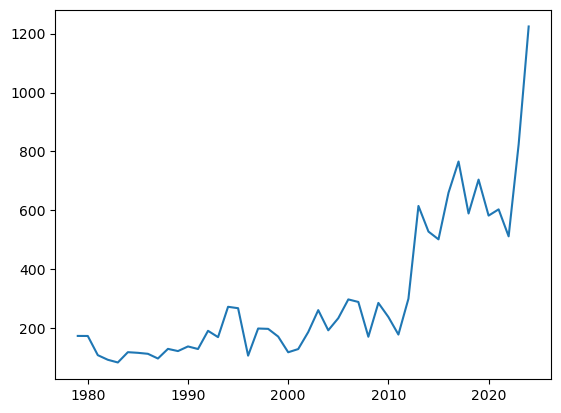

In [15]:
df = get_df("empty dataframe (usamos una palabra que no aparece)") # Creamos una matriz vacía

for i, word  in enumerate(crisp_words):
    w_df = get_df(word)                     # Creamos una matriz por palabra (frecuencia absoluta)
    df += w_df                              # La sumamos a la matriz general

df = df / total_words * 1000000             # Convertimos la frecuencia a relativa

plt.plot(years, df["Total"])
plt.show()

In [16]:
df.to_excel(f"total.xlsx", index=False)

#### Descripción

Observemos una clara tendencia ascendente con un pico en 2024 (últimos datos). Las palabras de la lista superan las 1000 / millón en su máximo, lo que supone un 0,1% del total. 

### Enfoque por partidos

Repetimos la misma operación segregando por partidos.

La frecuencia total tenida en cuenta es respecto del número total de palabras de cada partido. 

In [24]:
## Elegimos los colores que representan a cada partido

colors = {
    "PP": "blue",
    "PSOE": "red",
    "VOX": "#008080",
    "IU-PODEMOS-+": "pink"
}

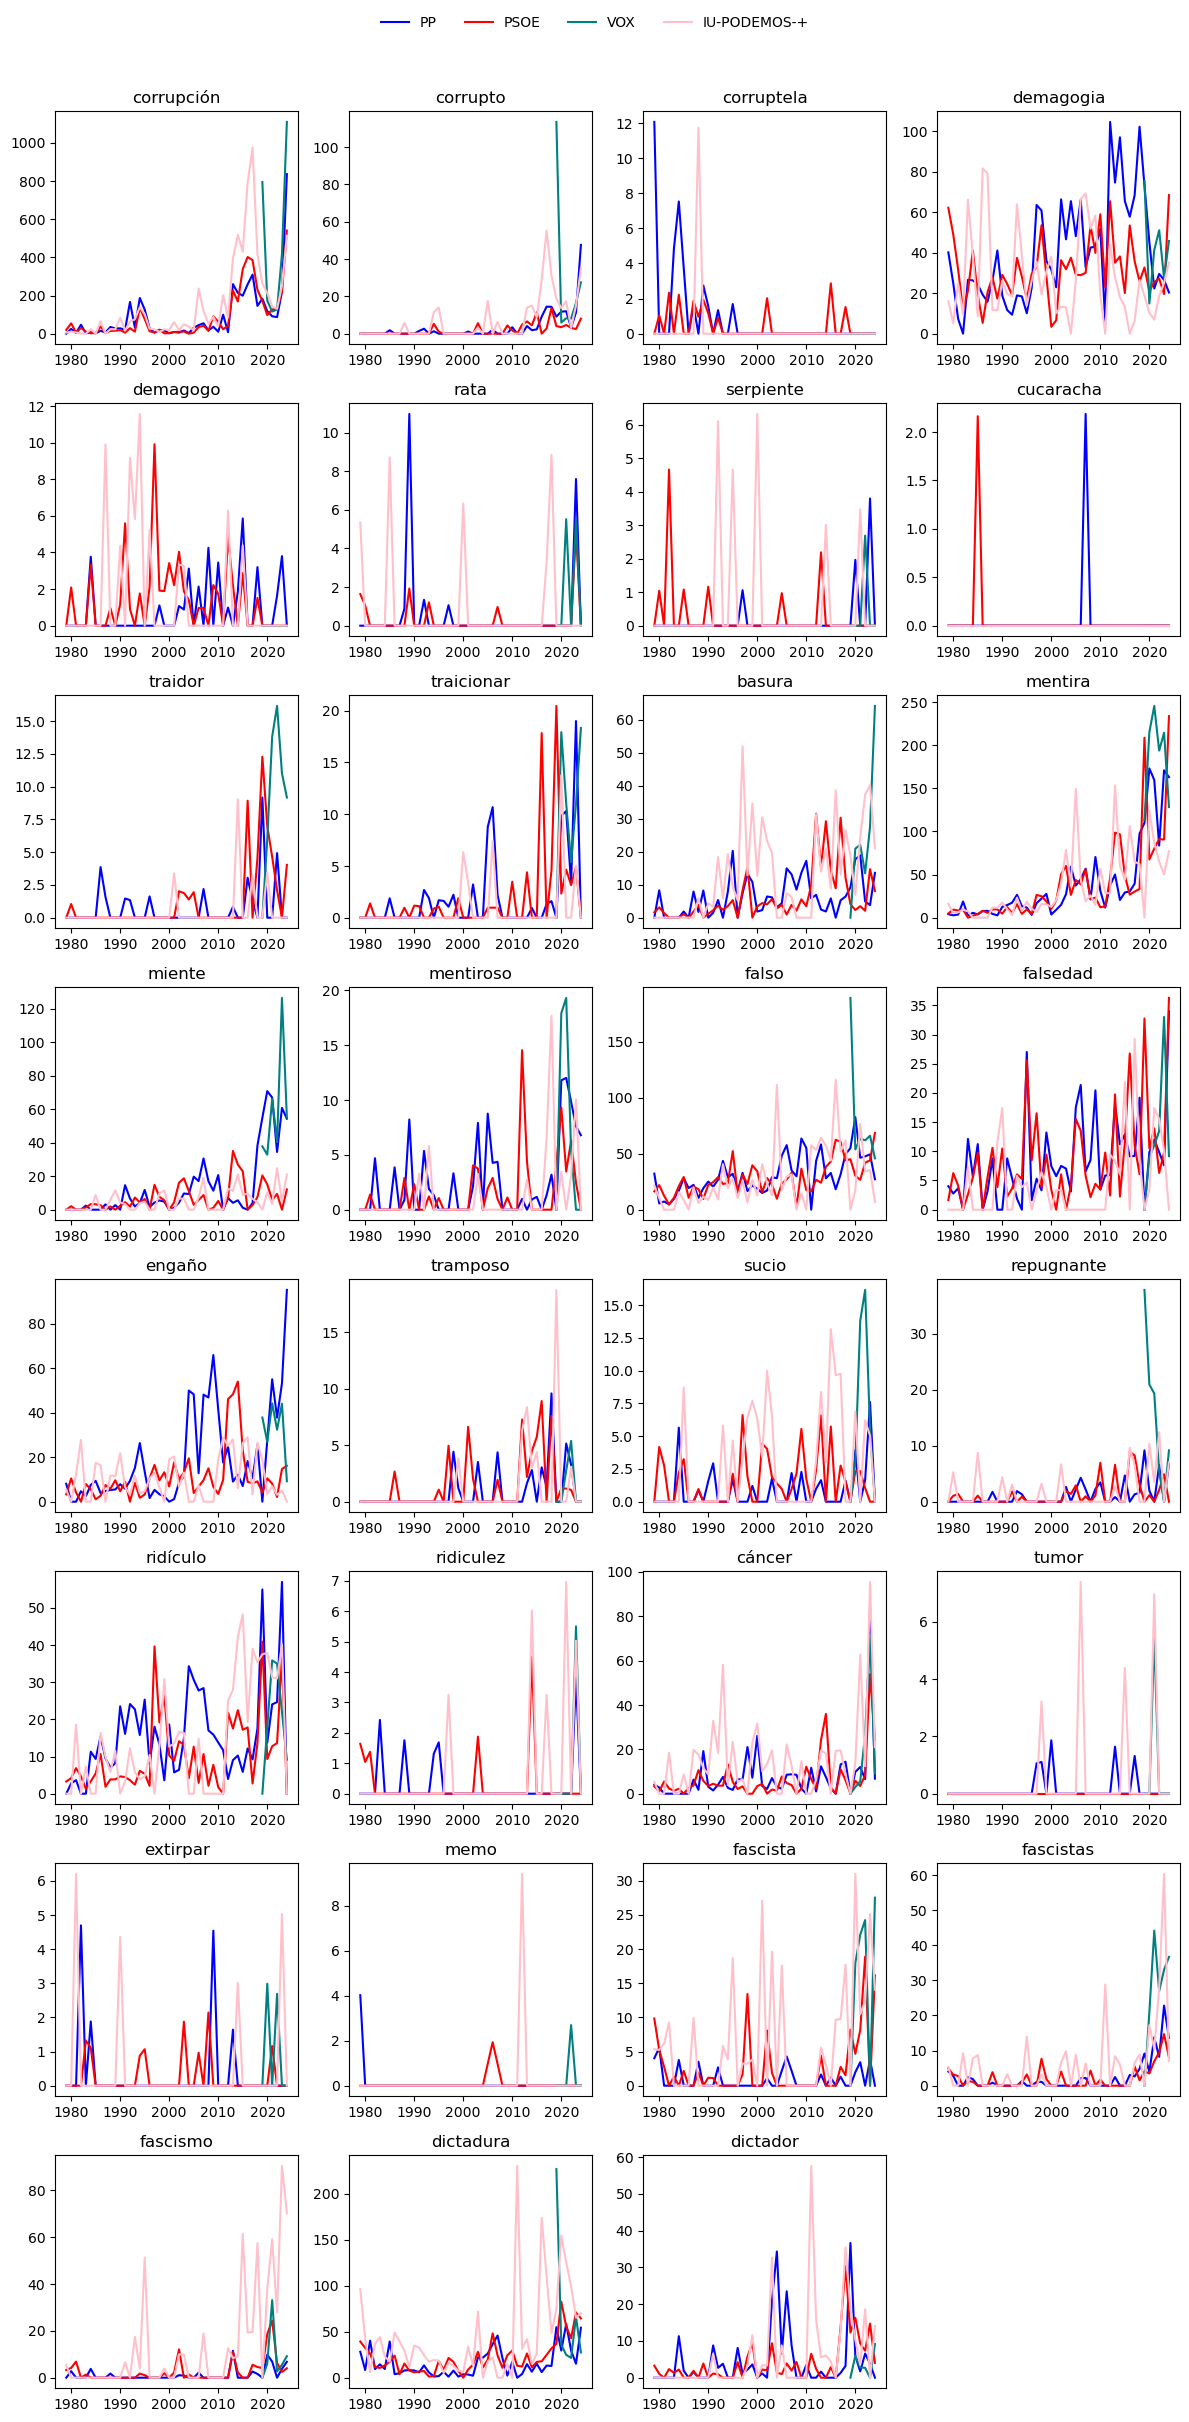

In [25]:
import matplotlib
import matplotlib.pyplot as plt

### Graficamos cada palabra por separado

fig_width = 12
plot_width = 3
columns = fig_width // plot_width
rows = len(crisp_words) // columns + 1

# Creamos una serie de cuadros que se ajustan automáticamente al número de palabras
fig, axes = plt.subplots(nrows = rows, ncols=columns, figsize=(fig_width, rows * 3))
axes = axes.flatten() 

for i, word  in enumerate(crisp_words):
    w_df = get_df(word)                     # Creamos una matriz por palabra (frecuencia absoluta)
    p_df = w_df / total_words * 1000000     # Creamos la matriz por millón (frecuencia relativa)

    axes[i].plot(years, p_df["PP"], c=colors["PP"])
    axes[i].plot(years, p_df["PSOE"], c=colors["PSOE"])
    axes[i].plot(years, p_df["VOX"], c=colors["VOX"])
    axes[i].plot(years, p_df["IU-PODEMOS"], c=colors["IU-PODEMOS-+"])

    axes[i].set_title(word)

# Apagamos los cuadros sin rellenar
for ax in axes[len(crisp_words):]:
    ax.axis("off")

# Creamos la leyenda
fig.legend(
    handles=[
        plt.Line2D([0], [0], color=color, label=label)
        for label, color in colors.items()
    ],
    loc="upper center",
    bbox_to_anchor=(0.5, 1.01), 
    ncol=len(colors),
    frameon=False
)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

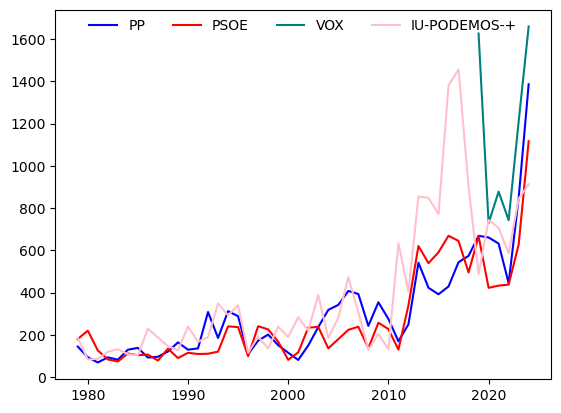

In [26]:
df = get_df("empty dataframe (usamos una palabra que no aparece)") # Creamos una matriz vacía

for i, word  in enumerate(crisp_words):
    w_df = get_df(word)                     # Creamos una matriz por palabra (frecuencia absoluta)
    df += w_df                              # La sumamos a la matriz general

df = df / total_words * 1000000             # Convertimos la frecuencia a relativa

plt.legend(
    handles=[
        plt.Line2D([0], [0], color=color, label=label)
        for label, color in colors.items()
    ],
    loc="upper center",
    bbox_to_anchor=(0.5, 1.01), 
    ncol=len(colors),
    frameon=False
)

plt.plot(years, df["PP"], c=colors["PP"])
plt.plot(years, df["PSOE"], c=colors["PSOE"])
plt.plot(years, df["VOX"], c=colors["VOX"])
plt.plot(years, df["IU-PODEMOS"], c=colors["IU-PODEMOS-+"])

plt.show()

### Descripción

Se observa la misma tendencia global que antes. Una primera subida entre 2010 y 2020 y otra tras 2020.

PSOE y PP se alternan hasta la explosión tras el 2020, donde el PP supera al PSOE. 

IU-PODEMOS se mantiene parecido hasta la primera explosión (entre el 2010 y 2020), donde supera por una diferencia al PSOE (~1300/millón frente ~700/millón).

VOX entra al Congreso en 2018 con números post-2020 (~1400/millón) y se mantiene con una caída (~800/millón) a comienzos de 2020, tras la que sube junto al resto de partido. Se mantiene primero en todo momento tras su aparición.

Todos los partidos alcanzan su máximo en 2024 (últimos datos). En orden de mayor a menor: VOX (~1600/millón), PP (~1300/millón), PSOE (~1100/millón), IU-PODEMOS (~700/millón)

### Enfoque por género

Repetimos la misma operación segregando por género.

La frecuencia total tenida en cuenta es respecto del número total de palabras de cada género. 

In [27]:
colors = {
    "Hombres": "blue",
    "Mujeres": "red"
}

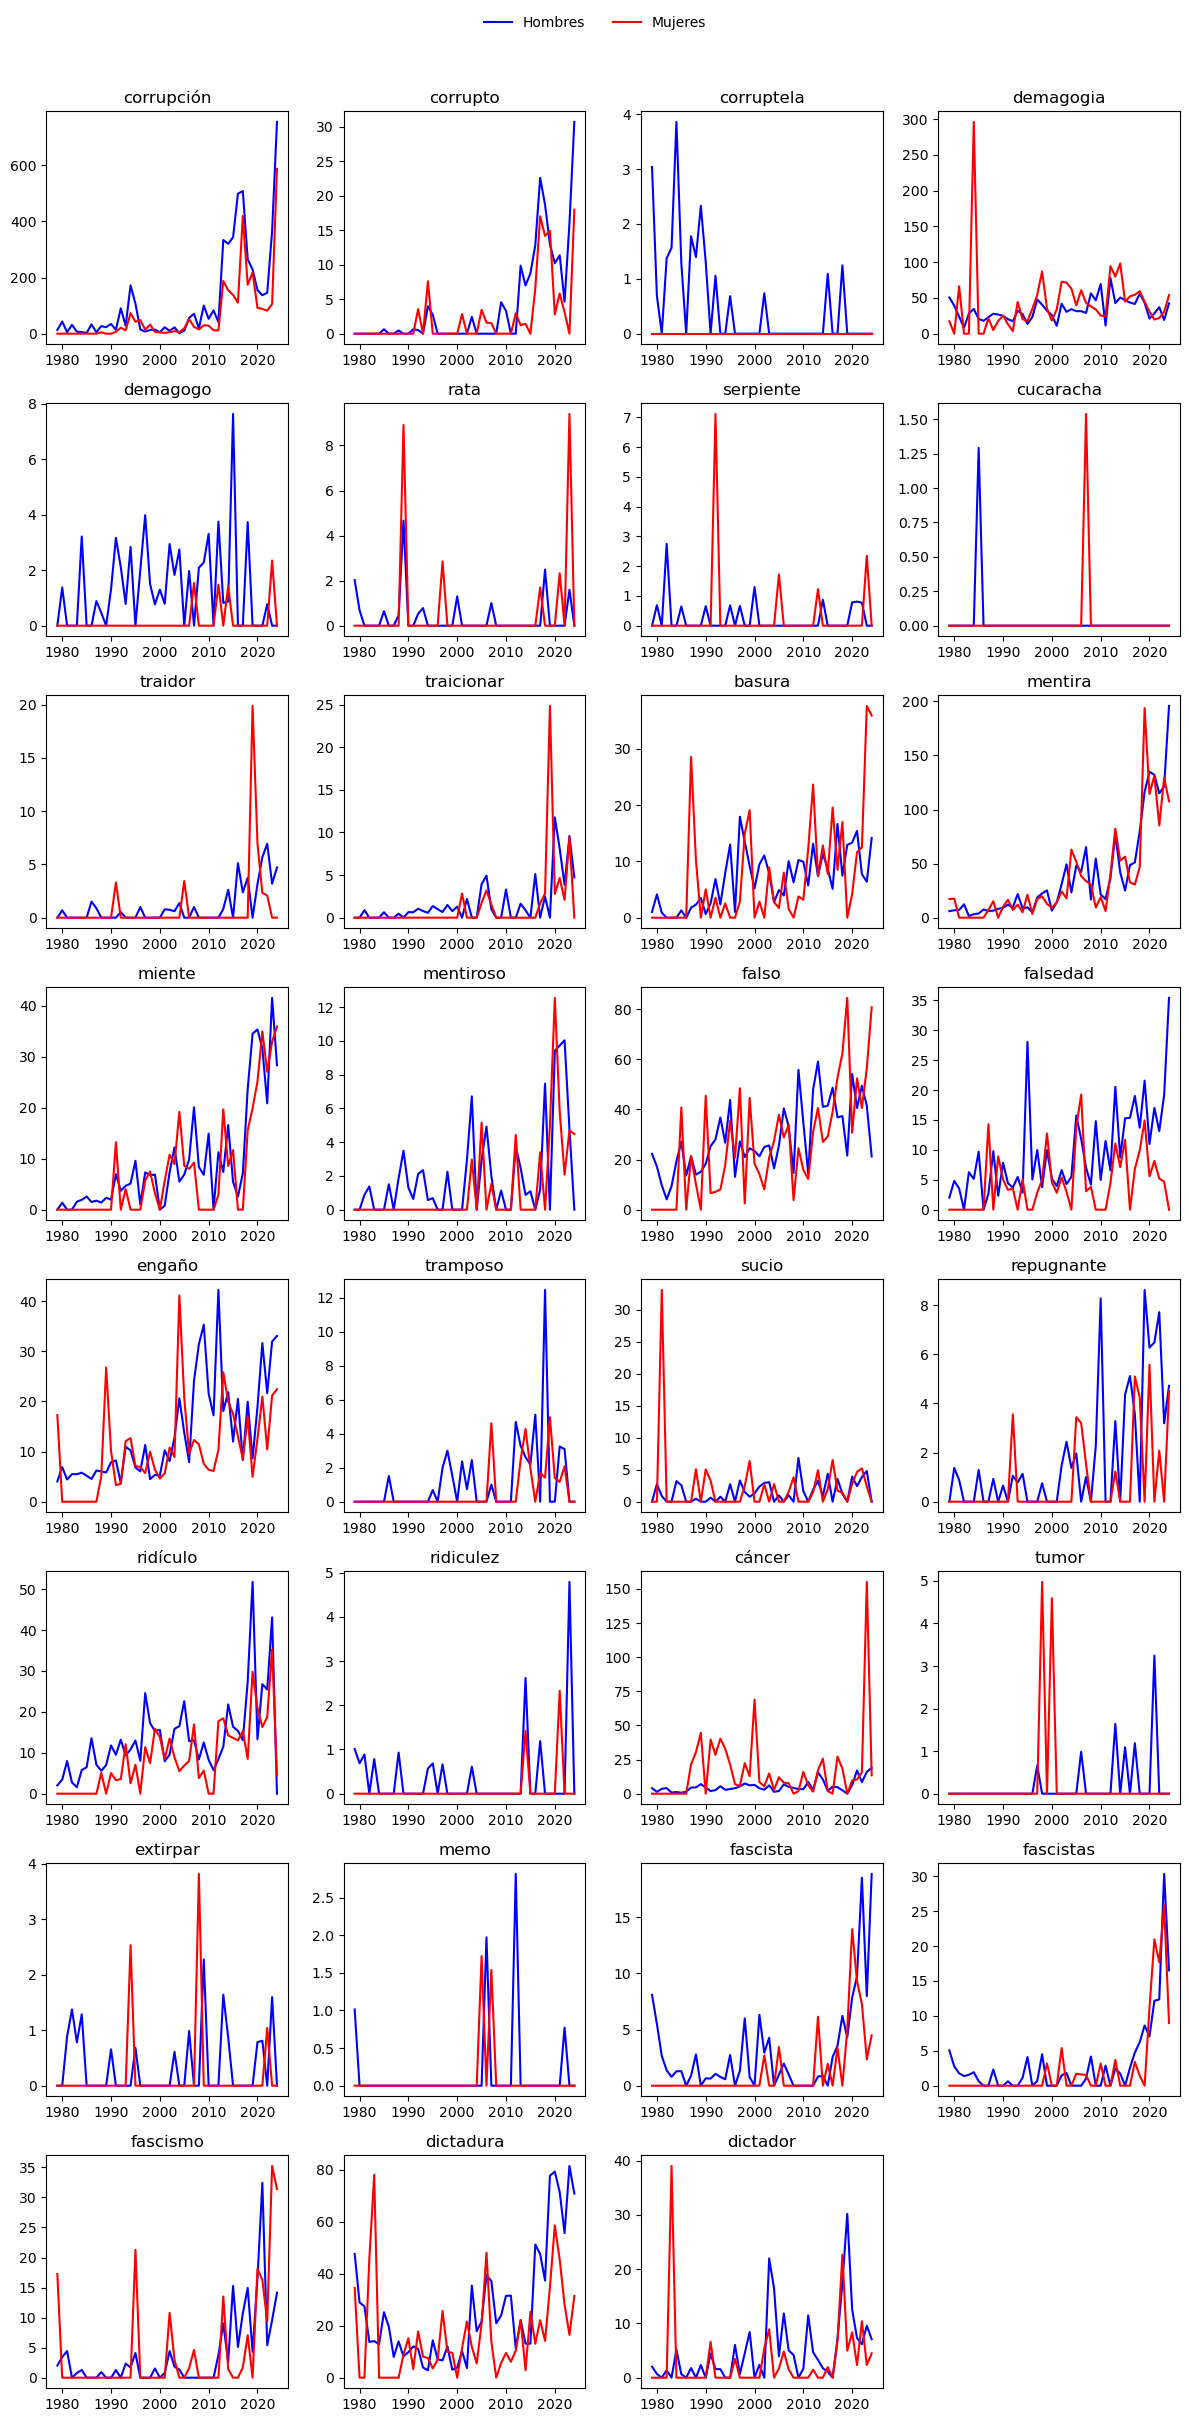

In [28]:
import matplotlib
import matplotlib.pyplot as plt

### Graficamos cada palabra por separado

fig_width = 12
plot_width = 3
columns = fig_width // plot_width
rows = len(crisp_words) // columns + 1

# Creamos una serie de cuadros que se ajustan automáticamente al número de palabras
fig, axes = plt.subplots(nrows = rows, ncols=columns, figsize=(fig_width, rows * 3))
axes = axes.flatten() 

for i, word  in enumerate(crisp_words):
    w_df = get_df(word)                     # Creamos una matriz por palabra (frecuencia absoluta)
    p_df = w_df / total_words * 1000000     # Creamos la matriz por millón (frecuencia relativa)

    axes[i].plot(years, p_df["Total - Male"], c=colors["Hombres"])
    axes[i].plot(years, p_df["Total - Female"], c=colors["Mujeres"])

    axes[i].set_title(word)

# Apagamos los cuadros sin rellenar
for ax in axes[len(crisp_words):]:
    ax.axis("off")

# Creamos la leyenda
fig.legend(
    handles=[
        plt.Line2D([0], [0], color=color, label=label)
        for label, color in colors.items()
    ],
    loc="upper center",
    bbox_to_anchor=(0.5, 1.01), 
    ncol=len(colors),
    frameon=False
)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

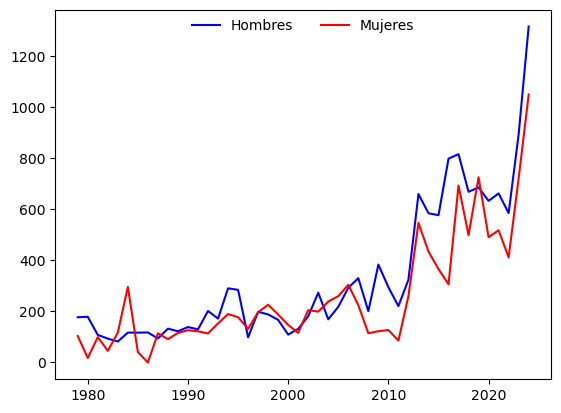

In [29]:
df = get_df("empty dataframe (usamos una palabra que no aparece)") # Creamos una matriz vacía

for i, word  in enumerate(crisp_words):
    w_df = get_df(word)                     # Creamos una matriz por palabra (frecuencia absoluta)
    df += w_df                              # La sumamos a la matriz general

df = df / total_words * 1000000             # Convertimos la frecuencia a relativa

plt.legend(
    handles=[
        plt.Line2D([0], [0], color=color, label=label)
        for label, color in colors.items()
    ],
    loc="upper center",
    bbox_to_anchor=(0.5, 1.01), 
    ncol=len(colors),
    frameon=False
)

plt.plot(years, df["Total - Male"], c=colors["Hombres"])
plt.plot(years, df["Total - Female"], c=colors["Mujeres"])

plt.show()

#### Descripción

Se observa un comportamiento bastante homogéno entre hombres y mujeres, preservando las tendencias ya mencionadas.

Se alcanza un máximo en 2024, donde los hombres registran ~1200/millón y las mujeres ~1000/millón.

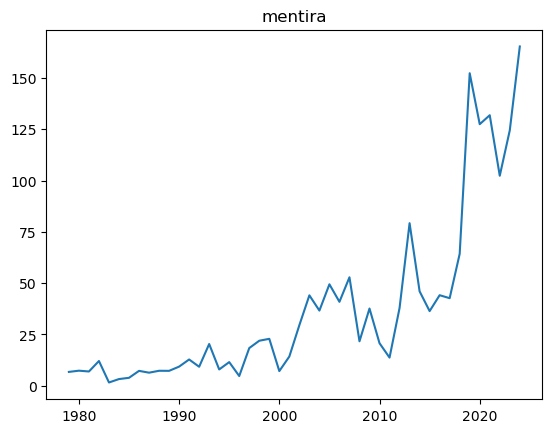

In [36]:
df = get_df("empty dataframe (usamos una palabra que no aparece)") # Creamos una matriz vacía

for i, word  in enumerate(["mentira"]):
    w_df = get_df(word)                     # Creamos una matriz por palabra (frecuencia absoluta)
    df += w_df                              # La sumamos a la matriz general

df = df / total_words * 1000000             # Convertimos la frecuencia a relativa

plt.title("mentira")
plt.plot(years, df["Total"])
plt.show()


KeyError: 'PP'

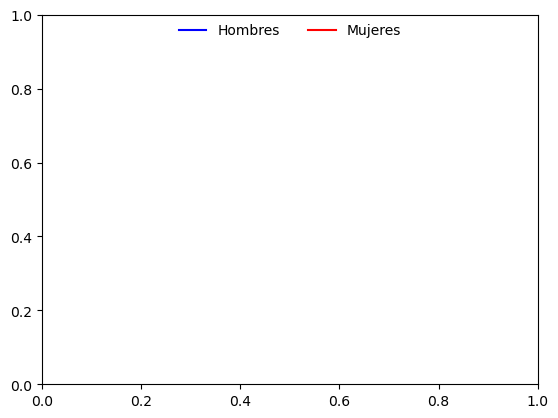

In [31]:
df = get_df("empty dataframe (usamos una palabra que no aparece)") # Creamos una matriz vacía

for i, word  in enumerate(["aplausos"]):
    w_df = get_df(word)                     # Creamos una matriz por palabra (frecuencia absoluta)
    df += w_df                              # La sumamos a la matriz general

df = df / total_words * 1000000             # Convertimos la frecuencia a relativa

plt.legend(
    handles=[
        plt.Line2D([0], [0], color=color, label=label)
        for label, color in colors.items()
    ],
    loc="upper center",
    bbox_to_anchor=(0.5, 1.01), 
    ncol=len(colors),
    frameon=False
)

plt.plot(years, df["PP"], c=colors["PP"])
plt.plot(years, df["PSOE"], c=colors["PSOE"])
plt.plot(years, df["VOX"], c=colors["VOX"])
plt.plot(years, df["IU-PODEMOS"], c=colors["IU-PODEMOS-+"])


## Conclusiones e interpretación personal

La presencia de palabras que indican crispación es un indicador que aumenta la probabildad de encontrar crispación y polarización afectiva en el corpus más que un indicador de la crispación en si misma. Sin embargo, debido a la tendencia tan clara y congruente con otros datos de polarización política y con la amplia creencia popular, parece evidente que existe un aumento de la crispación en el Congreso de los Diputados. 

Acorde a estos datos, parece que los partidos de derechas se comportan de forma más crispada y polarizada. Por otra parte, no existe esa tendencia en la evidencia científica que ni el consenso popular que respalden los datos.

### Más información
Creamos un Google Spreadsheet (excel) accesible con todas las tablas de frecuencia de cada palabra.

Link de la hoja de cálculo: **INSERTAR LINK DE GOOGLE**